In [32]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats
import pylab
from scipy.stats import sem, ttest_ind,linregress

In [33]:
# import US housing v unemployment file
US_housing_v_unemployment = "Housing v Unemployment for US.xlsx"
US_housing_v_unemployment = pd.read_excel(US_housing_v_unemployment)
US_housing_v_unemployment.head()

,Date (Quarterly),Avg Home Price,Unemployment Rate (%),Avg Home Price Chg,Unemployment Rate Chg,Avg Home Price Chg (Norm),Unemployment Rate Chg (Norm)
2,7/1/1970,23000,5.316556,-0.057377,0.105604,-0.071344,0.104764
3,10/1/1970,22600,5.825915,-0.017391,0.095806,-0.031358,0.094967
4,1/1/1971,24300,5.995553,0.075221,0.029118,0.061255,0.028278
5,4/1/1971,25800,6.019385,0.061728,0.003975,0.047762,0.003135
6,7/1/1971,25300,6.131638,-0.019380,0.018649,-0.033347,0.017809


In [34]:
# import US housing v unemployment file 10 yrs
US_housing_v_unemployment_10yr = "Housing v Unemployment for US (10yrs).xlsx"
US_housing_v_unemployment_10yr = pd.read_excel(US_housing_v_unemployment_10yr)
US_housing_v_unemployment_10yr.head()

,Date (Quarterly),Avg Home Price,Unemployment Rate (%),Avg Home Price Chg,Unemployment Rate Chg,Avg Home Price Chg (Norm),Unemployment Rate Chg (Norm)
157,4/1/2009,220900,9.385747,0.059981,0.118673,0.046014,0.117834
158,7/1/2009,214300,9.733635,-0.029878,0.037066,-0.043844,0.036226
159,10/1/2009,219000,10.086535,0.021932,0.036256,0.007965,0.035416
160,1/1/2010,222900,9.947779,0.017808,-0.013757,0.003842,-0.014596
161,4/1/2010,219500,9.832738,-0.015253,-0.011564,-0.029220,-0.012404


In [35]:
# import regional housing v unemployment file 10 yrs
housing_v_unemployment_region = "Housing v Unemployment for Region (10 yrs).xlsx"
housing_v_unemployment_region = pd.read_excel(housing_v_unemployment_region)
housing_v_unemployment_region.head()

,Date (Quarterly),NorthEast AHP,MidWest AHP,West AHP,South AHP,NorthEast AHP Chg,MidWest AHP Chg,West AHP Chg,South AHP Chg,NorthEast AHP Chg (Norm),...,South UE%,West UE%,NorthEast UE Chg,MidWest UE Chg,West UE Chg,South UE Chg,NorthEast UE Chg (Norm),MidWest UE Chg (Norm),West UE Chg (Norm),South UE Chg (Norm)
155,10/1/2014,605000,312400,420600,332500,-0.003131,0.009044,0.069685,0.119152,-0.022687,...,5.8,6.4,0.000000,-0.018182,-0.015385,0.000000,0.001574,-0.017109,-0.014021,0.001022
156,1/1/2015,621400,320200,408700,309000,0.027107,0.024968,-0.028293,-0.070677,0.007552,...,5.5,6.1,-0.017544,-0.019231,-0.016129,-0.017857,-0.015970,-0.018158,-0.014765,-0.016835
157,4/1/2015,485000,325300,391100,306300,-0.219504,0.015928,-0.043063,-0.008738,-0.239060,...,5.4,5.9,0.000000,0.000000,-0.016667,-0.018182,0.001574,0.001072,-0.015303,-0.017160
158,7/1/2015,526700,302000,409600,312200,0.085979,-0.071626,0.047302,0.019262,0.066423,...,5.2,5.7,-0.018868,0.000000,0.000000,-0.018868,-0.017294,0.001072,0.001364,-0.017846
159,10/1/2015,641300,313600,427200,324200,0.217581,0.038411,0.042969,0.038437,0.198025,...,5.1,5.4,-0.020000,-0.021277,-0.018182,0.000000,-0.018426,-0.020204,-0.016818,0.001022


<function matplotlib.pyplot.show(*args, **kw)>

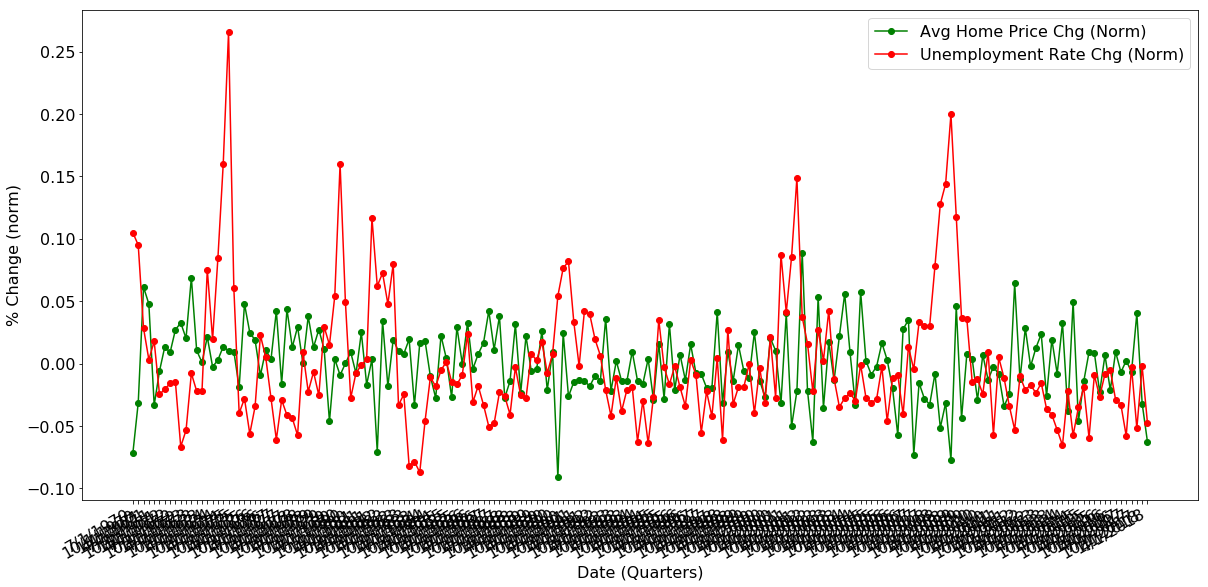

In [36]:
#plot US data
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

x = US_housing_v_unemployment["Date (Quarterly)"]
y1 = US_housing_v_unemployment["Avg Home Price Chg (Norm)"]
y2 = US_housing_v_unemployment["Unemployment Rate Chg (Norm)"]

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")
fig.set_label("Home Price v. Unemployment - last 10 yrs")

AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment US.png')
plt.show

In [37]:
stats.chisquare(US_housing_v_unemployment["Avg Home Price Chg (Norm)"], US_housing_v_unemployment["Unemployment Rate Chg (Norm)"])

Power_divergenceResult(statistic=-7.288399236389502, pvalue=1.0)

In [38]:
US_housing_v_unemployment["Avg Home Price Chg (Norm)"].corr(US_housing_v_unemployment["Unemployment Rate Chg (Norm)"])

-0.18935060458086425

<function matplotlib.pyplot.show(*args, **kw)>

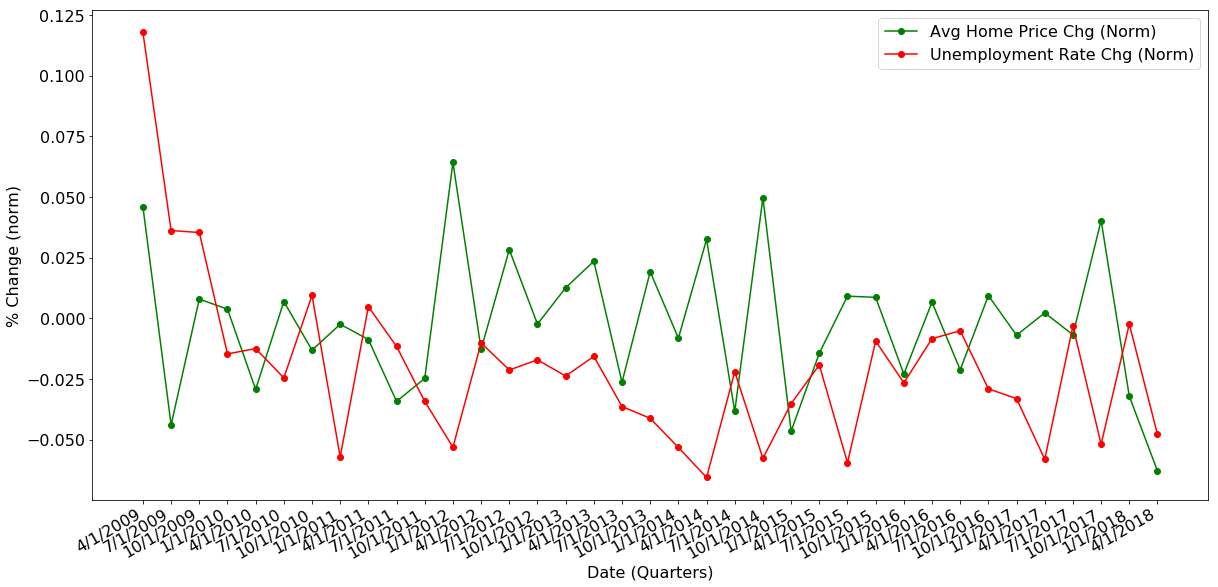

In [39]:
#plot US data 10yr
x_10yr = US_housing_v_unemployment_10yr["Date (Quarterly)"]
y1_10yr = US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"]
y2_10yr = US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig2, ax2 = plt.subplots()

ax2.set_xlabel("Date (Quarters)")
ax2.set_ylabel("% Change (norm)")


AHP_Chg_10yr = plt.plot(x_10yr, y1_10yr, color='g', marker = 'o')
UER_Chg_10yr = plt.plot(x_10yr, y2_10yr, color='r', marker = 'o')

plt.legend(loc= "best")

ax2.grid(False)
fig2.autofmt_xdate()
plt.savefig('housing v unemployment US 10yr.png')
plt.show

In [40]:
stats.ttest_ind(US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"], US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=2.486582669145937, pvalue=0.015217425274643242)

In [41]:
stats.f_oneway(US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"], US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"])

F_onewayResult(statistic=6.183093370496933, pvalue=0.015217425274643233)

In [42]:
stats.chisquare(US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"], US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"])

Power_divergenceResult(statistic=-1.7708613543174088, pvalue=1.0)

In [43]:
US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"].corr(US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"])

-0.045917839469143865

<function matplotlib.pyplot.show(*args, **kw)>

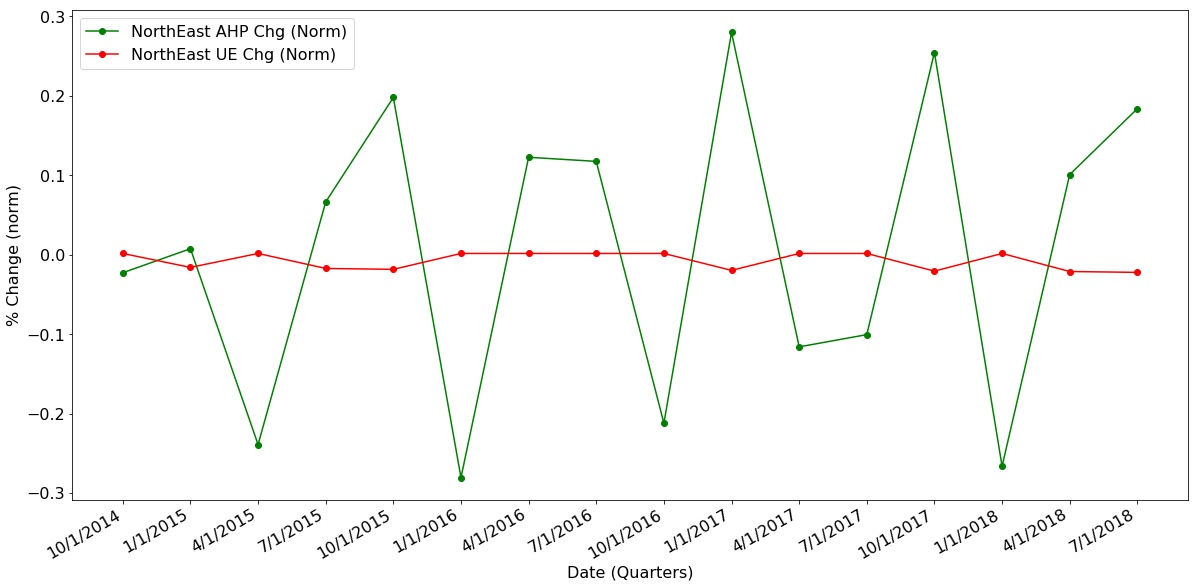

In [44]:
#NORTHEAST

import pylab

x = housing_v_unemployment_region["Date (Quarterly)"]
y1 = housing_v_unemployment_region["NorthEast AHP Chg (Norm)"]
y2 = housing_v_unemployment_region["NorthEast UE Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")


AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment northeast.png')
plt.show

In [45]:
stats.ttest_ind(housing_v_unemployment_region["NorthEast AHP Chg (Norm)"], housing_v_unemployment_region["NorthEast UE Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=0.28452810455690297, pvalue=0.7779605498157851)

In [46]:
stats.f_oneway(housing_v_unemployment_region["NorthEast AHP Chg (Norm)"], housing_v_unemployment_region["NorthEast UE Chg (Norm)"])

F_onewayResult(statistic=0.08095624228274402, pvalue=0.7779605498157837)

In [47]:
stats.chisquare(housing_v_unemployment_region["NorthEast AHP Chg (Norm)"], housing_v_unemployment_region["NorthEast UE Chg (Norm)"])

Power_divergenceResult(statistic=181.7801169697999, pvalue=1.0399475420285565e-30)

In [48]:
housing_v_unemployment_region["NorthEast AHP Chg (Norm)"].corr(housing_v_unemployment_region["NorthEast UE Chg (Norm)"])

-0.7434253185204501

<function matplotlib.pyplot.show(*args, **kw)>

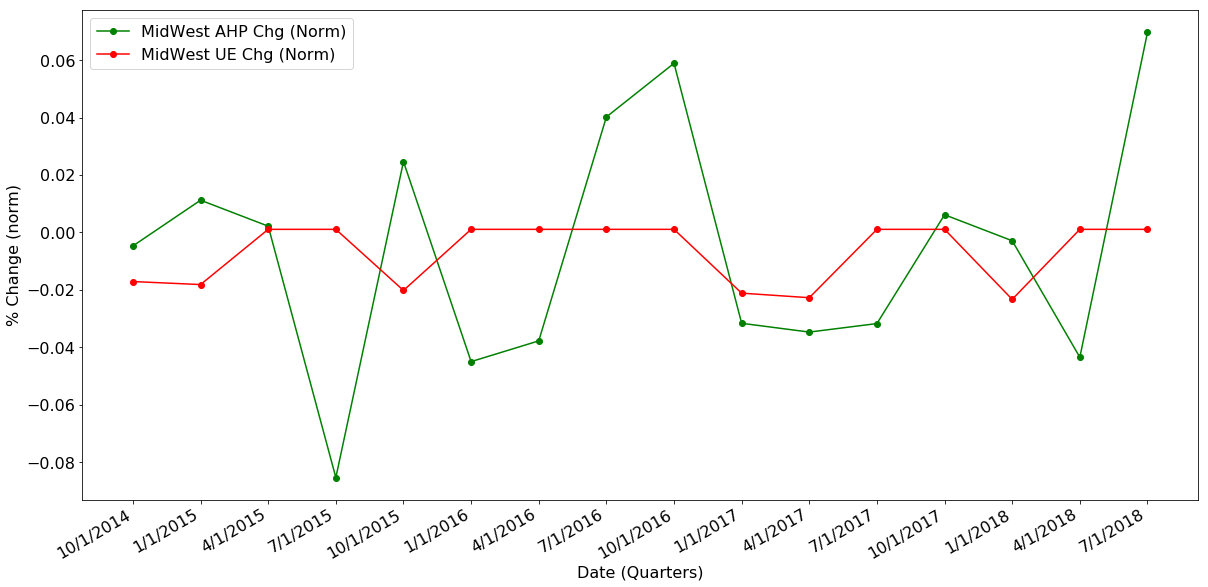

In [49]:
#MIDWEST

x = housing_v_unemployment_region["Date (Quarterly)"]
y1 = housing_v_unemployment_region["MidWest AHP Chg (Norm)"]
y2 = housing_v_unemployment_region["MidWest UE Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")


AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment midwest.png')
plt.show 

In [50]:
stats.ttest_ind(housing_v_unemployment_region["MidWest AHP Chg (Norm)"], housing_v_unemployment_region["MidWest UE Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=0.04433122803923622, pvalue=0.9649341473775759)

In [51]:
stats.f_oneway(housing_v_unemployment_region["MidWest AHP Chg (Norm)"], housing_v_unemployment_region["MidWest UE Chg (Norm)"])

F_onewayResult(statistic=0.0019652577794667457, pvalue=0.9649341473775784)

In [52]:
stats.chisquare(housing_v_unemployment_region["MidWest AHP Chg (Norm)"], housing_v_unemployment_region["MidWest UE Chg (Norm)"])

Power_divergenceResult(statistic=21.97861957189398, pvalue=0.1083657531025277)

In [53]:
housing_v_unemployment_region["MidWest AHP Chg (Norm)"].corr(housing_v_unemployment_region["MidWest UE Chg (Norm)"])

0.015275807214688382

<function matplotlib.pyplot.show(*args, **kw)>

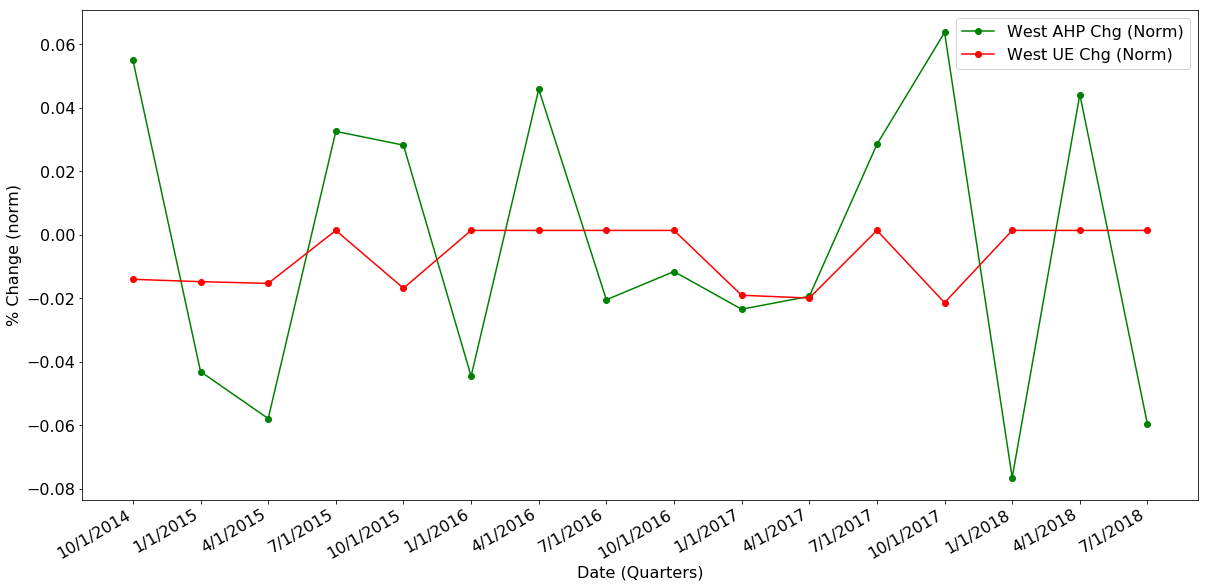

In [54]:
#WEST

x = housing_v_unemployment_region["Date (Quarterly)"]
y1 = housing_v_unemployment_region["West AHP Chg (Norm)"]
y2 = housing_v_unemployment_region["West UE Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")


AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment west.png')
plt.show 

In [55]:
stats.ttest_ind(housing_v_unemployment_region["West AHP Chg (Norm)"], housing_v_unemployment_region["West UE Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=0.26797827347598474, pvalue=0.7905500380294426)

In [56]:
stats.f_oneway(housing_v_unemployment_region["West AHP Chg (Norm)"], housing_v_unemployment_region["West UE Chg (Norm)"])

F_onewayResult(statistic=0.07181235505516959, pvalue=0.7905500380294426)

In [57]:
stats.chisquare(housing_v_unemployment_region["West AHP Chg (Norm)"], housing_v_unemployment_region["West UE Chg (Norm)"])

Power_divergenceResult(statistic=12.240166320648793, pvalue=0.6607668486251853)

In [58]:
housing_v_unemployment_region["West AHP Chg (Norm)"].corr(housing_v_unemployment_region["West UE Chg (Norm)"])

-0.10953354477153378

<function matplotlib.pyplot.show(*args, **kw)>

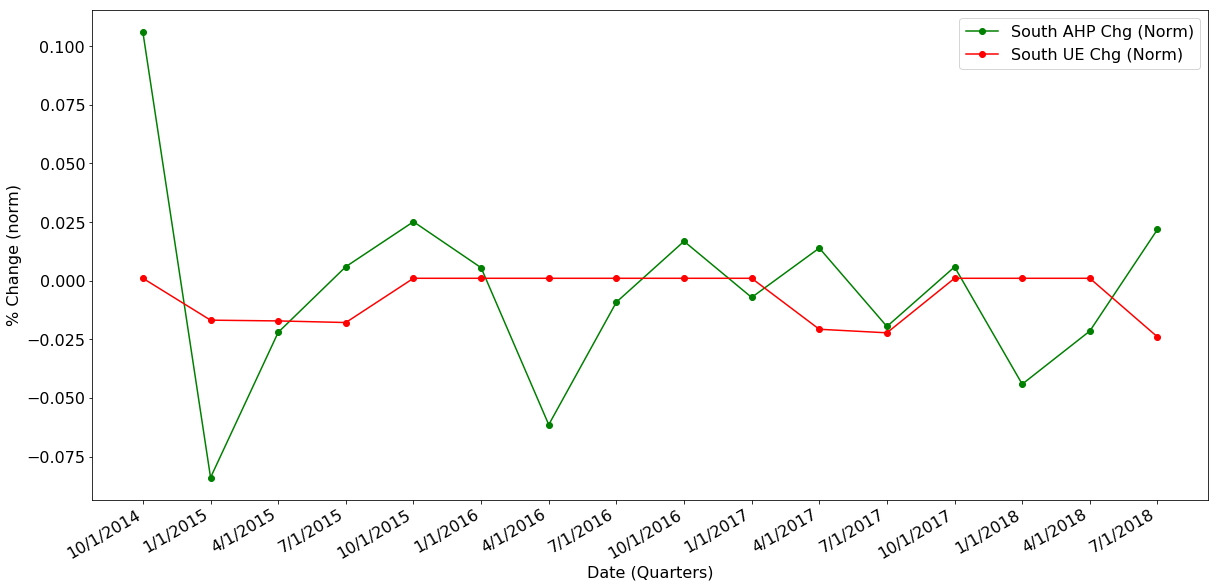

In [59]:
#SOUTH

x = housing_v_unemployment_region["Date (Quarterly)"]
y1 = housing_v_unemployment_region["South AHP Chg (Norm)"]
y2 = housing_v_unemployment_region["South UE Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")


AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment south.png')
plt.show

In [60]:
stats.ttest_ind(housing_v_unemployment_region["South AHP Chg (Norm)"], housing_v_unemployment_region["South UE Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=0.23331420551782625, pvalue=0.8171021036384443)

In [61]:
stats.f_oneway(housing_v_unemployment_region["South AHP Chg (Norm)"], housing_v_unemployment_region["South UE Chg (Norm)"])

F_onewayResult(statistic=0.054435518496414446, pvalue=0.8171021036384403)

In [62]:
stats.chisquare(housing_v_unemployment_region["South AHP Chg (Norm)"], housing_v_unemployment_region["South UE Chg (Norm)"])

Power_divergenceResult(statistic=17.63297612374302, pvalue=0.2824522703423158)

In [63]:
housing_v_unemployment_region["South AHP Chg (Norm)"].corr(housing_v_unemployment_region["South UE Chg (Norm)"])

0.12888566104547863

In [64]:
# import US household income file
housing_file = "housingincome_region.csv"
housing_v_income_region = pd.read_csv(housing_file)
housing_v_income_region.head()

,Date,West Income,NorthEast Income,South Income,MidWest Income,NorthEast HP,MidWest HP,West HP,South HP,Avg West HP Chg,...,Avg NorthEast HP Chg (Norm),NorthEast Income Chg (Norm),Avg MidWest HP Chg,MidWest Income Chg,Avg MidWest HP Chg (Norm),MidWest Income Chg (Norm),Avg South HP Chg,South Income Chg,Avg South HP Chg (Norm),South Income Chg (Norm)
0,1976,68904,67903,60730,69804,50125,48725,51925,43775,0.174110,...,-0.003299,-0.014752,0.125289,0.041866,0.074816,0.031999,0.106128,0.032929,0.053151,0.021739
1,1977,69769,70404,62512,69577,54600,55325,61275,48025,0.180067,...,0.024007,0.024240,0.135454,-0.003252,0.084982,-0.013119,0.097087,0.029343,0.044110,0.018153
2,1978,73517,71273,64365,71526,62800,64350,70650,55650,0.152999,...,0.084913,-0.000248,0.163127,0.028012,0.112655,0.018145,0.158771,0.029642,0.105794,0.018453
3,1979,75181,73252,64740,72311,72050,72950,82875,63525,0.173036,...,0.082023,0.015175,0.133644,0.010975,0.083172,0.001108,0.141509,0.005826,0.088532,-0.005363
4,1980,73106,70516,63034,69152,79475,74475,89875,69100,0.084465,...,0.037784,-0.049942,0.020905,-0.043686,-0.029568,-0.053554,0.087761,-0.026352,0.034784,-0.037541


TypeError: 'builtin_function_or_method' object is not subscriptable

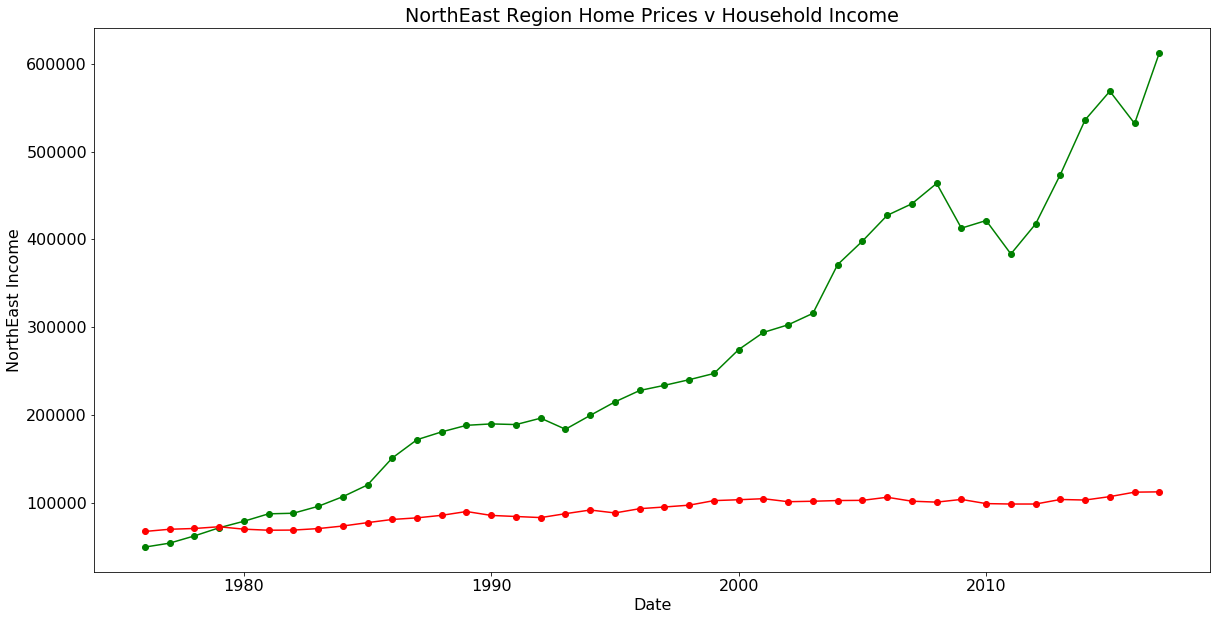

In [65]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("NorthEast Income")
plt.title("NorthEast Region Home Prices v Household Income")


NEHP = housing_v_income_region["NorthEast HP"]
NEI = housing_v_income_region["NorthEast Income"]


x_axis1 = housing_v_income_region["Date"]

NEHP_trend = plt.plot(x_axis1,NEHP,color='g',marker = "o")
NEI_trend = plt.plot(x_axis1,NEI,color='r',marker = "o")

plt.savefig("NE Vs Income.jpg")

ax.set_xlim(len["Date"])

fig1.autofmt_xdate()
plt.legend(loc="best")

In [66]:
housing_v_income_region["NorthEast HP"].corr(housing_v_income_region["NorthEast Income"])

0.9049753354900574

In [67]:
stats.ttest_ind(housing_v_income_region["NorthEast HP"], 
                 housing_v_income_region["NorthEast Income"],
                 equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=7.249948903451887, pvalue=2.0925939764313356e-10)

In [68]:
stats.ttest_ind(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"], axis=0, equal_var=False)

Ttest_indResult(statistic=7.249948903451887, pvalue=6.733908901331057e-09)

In [69]:
stats.f_oneway(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"])

F_onewayResult(statistic=52.561759102663274, pvalue=2.092593976431308e-10)

In [70]:
stats.chisquare(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"])

Power_divergenceResult(statistic=21089347.792333677, pvalue=0.0)

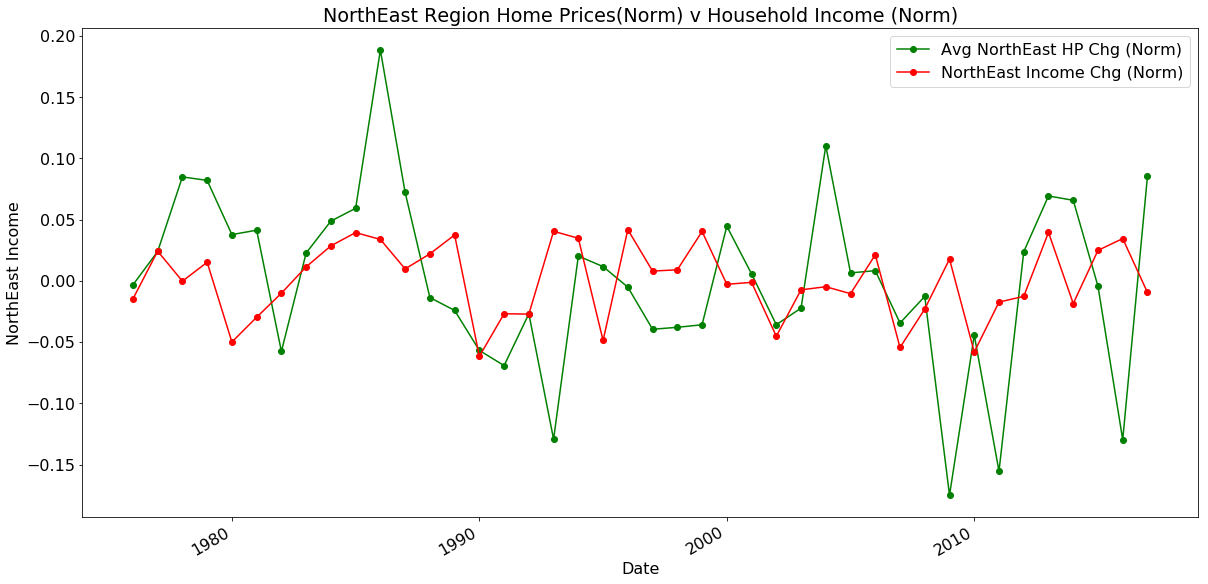

In [71]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("NorthEast Income")
plt.title("NorthEast Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg NorthEast HP Chg (Norm)"]
Inc_W = housing_v_income_region["NorthEast Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")

plt.savefig("NE Vs Income(Norm).jpg")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [72]:
housing_v_income_region["NorthEast Income Chg (Norm)"].corr(housing_v_income_region["Avg NorthEast HP Chg (Norm)"])

0.10368327318093802

In [73]:
linregress(housing_v_income_region["NorthEast Income Chg (Norm)"], housing_v_income_region["Avg NorthEast HP Chg (Norm)"])

LinregressResult(slope=0.24123321663554567, intercept=8.291586696520504e-11, rvalue=0.10368327318093801, pvalue=0.5134786242210739, stderr=0.3658907194603212)

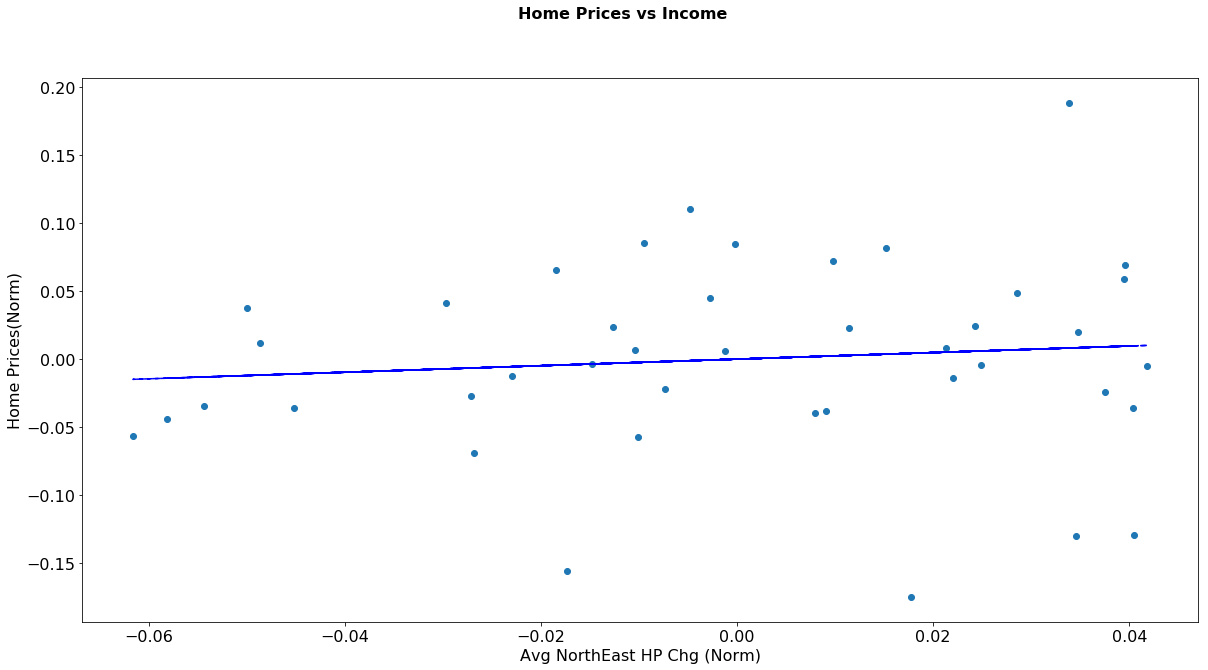

In [74]:
x_axis = housing_v_income_region["NorthEast Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg NorthEast HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg NorthEast HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

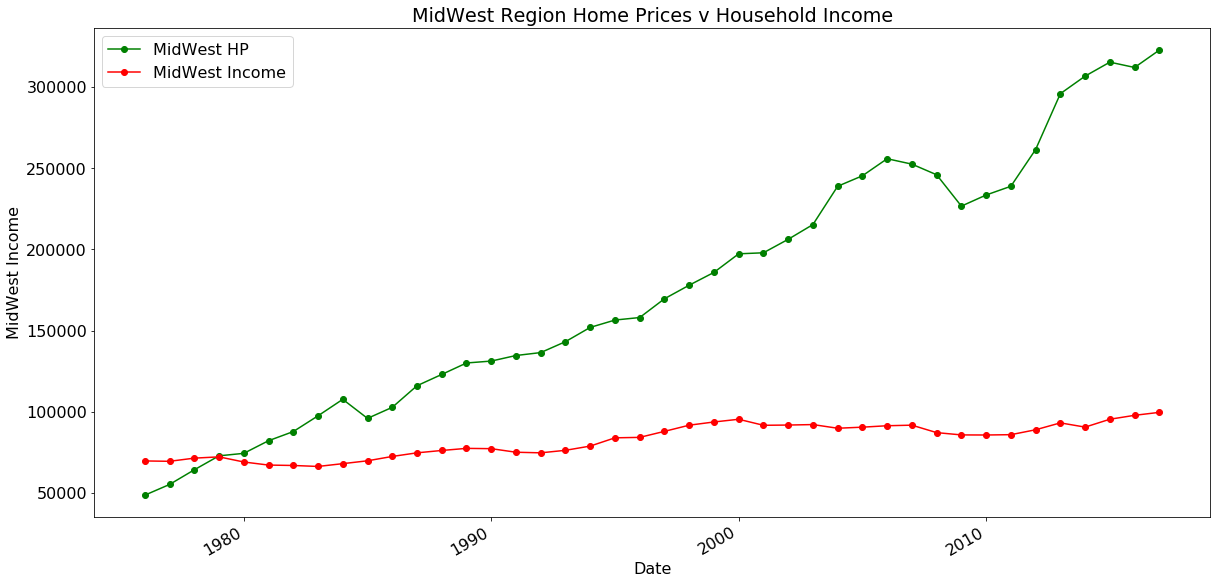

In [75]:
 #MIDWEST

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("MidWest Income")
plt.title("MidWest Region Home Prices v Household Income")

MWHP = housing_v_income_region["MidWest HP"]
MWI = housing_v_income_region["MidWest Income"]


x_axis1 = housing_v_income_region["Date"]

MWHP_trend = plt.plot(x_axis1,MWHP,color='g',marker = "o")
MWI_trend = plt.plot(x_axis1,MWI,color='r',marker = "o")


plt.savefig("MW Vs Income.png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [76]:
housing_v_income_region["MidWest Income"].corr(housing_v_income_region["MidWest HP"])

0.9016640812020873

In [77]:
stats.f_oneway(housing_v_income_region["MidWest HP"], housing_v_income_region["MidWest Income"])

F_onewayResult(statistic=57.2075675787015, pvalue=5.080184377408186e-11)

In [78]:
stats.chisquare(housing_v_income_region["MidWest HP"], housing_v_income_region["MidWest Income"])

Power_divergenceResult(statistic=6238510.300290037, pvalue=0.0)

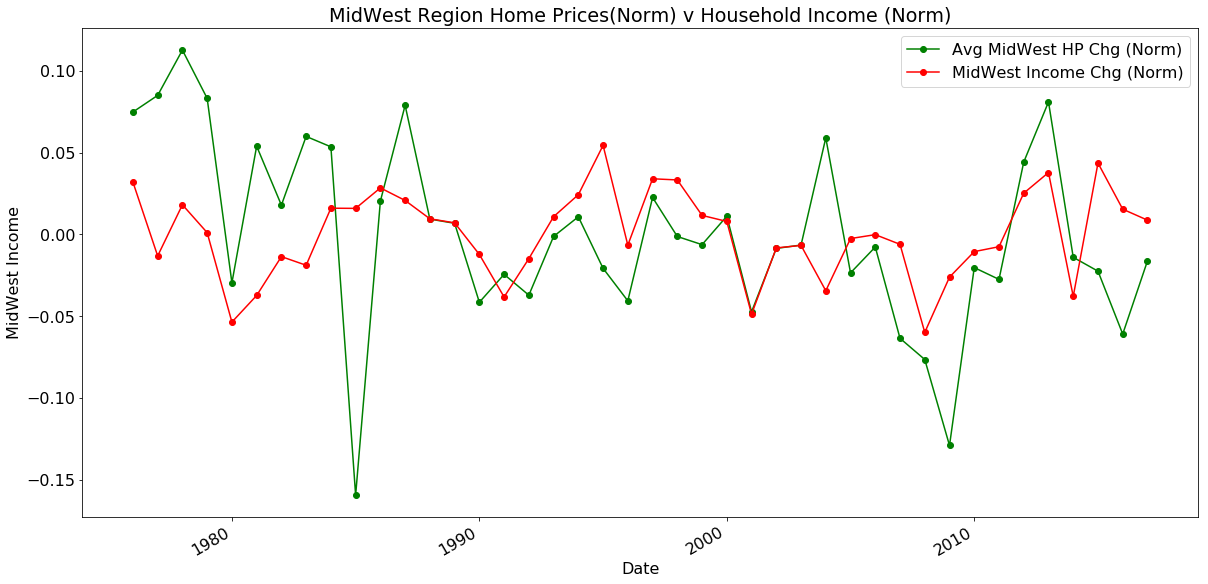

In [79]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("MidWest Income")
plt.title("MidWest Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg MidWest HP Chg (Norm)"]
Inc_W = housing_v_income_region["MidWest Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.savefig("MW Vs Income(Norm).png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [80]:
housing_v_income_region["MidWest Income Chg (Norm)"].corr(housing_v_income_region["Avg MidWest HP Chg (Norm)"])

0.2607926346973953

In [81]:
linregress(housing_v_income_region["MidWest Income Chg (Norm)"], housing_v_income_region["Avg MidWest HP Chg (Norm)"])

LinregressResult(slope=0.5400245957651517, intercept=-1.905934166550456e-12, rvalue=0.2607926346973952, pvalue=0.09528983285830739, stderr=0.316077220199488)

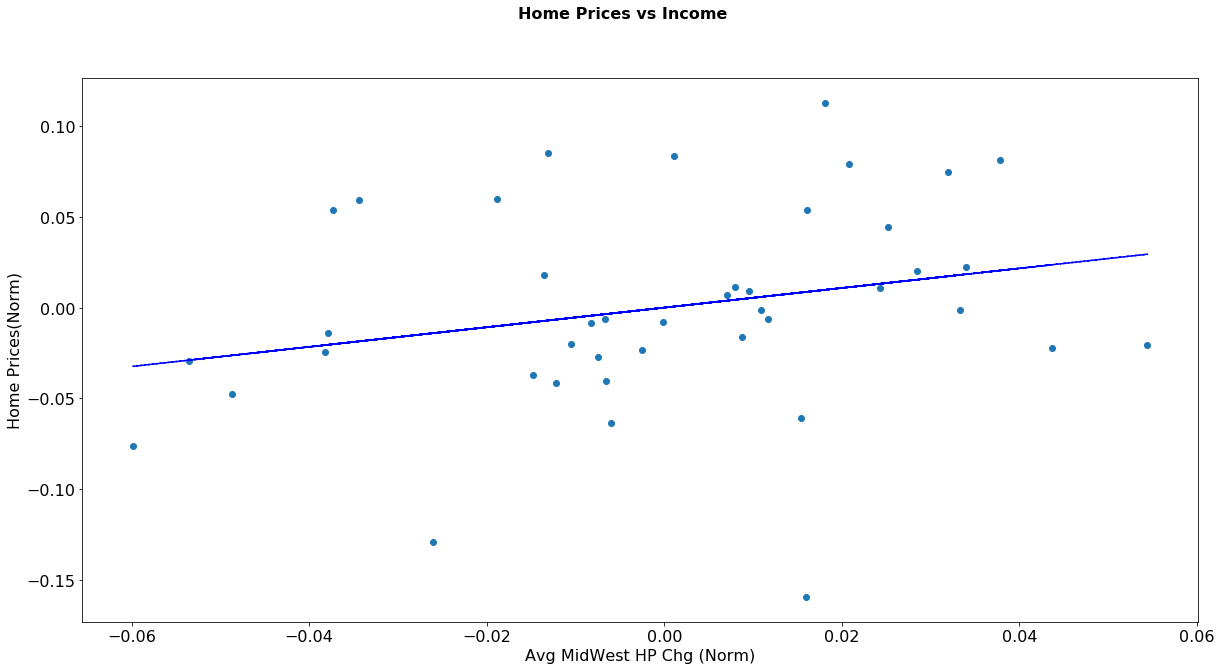

In [82]:
# Set data
x_axis = housing_v_income_region["MidWest Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg MidWest HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg MidWest HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

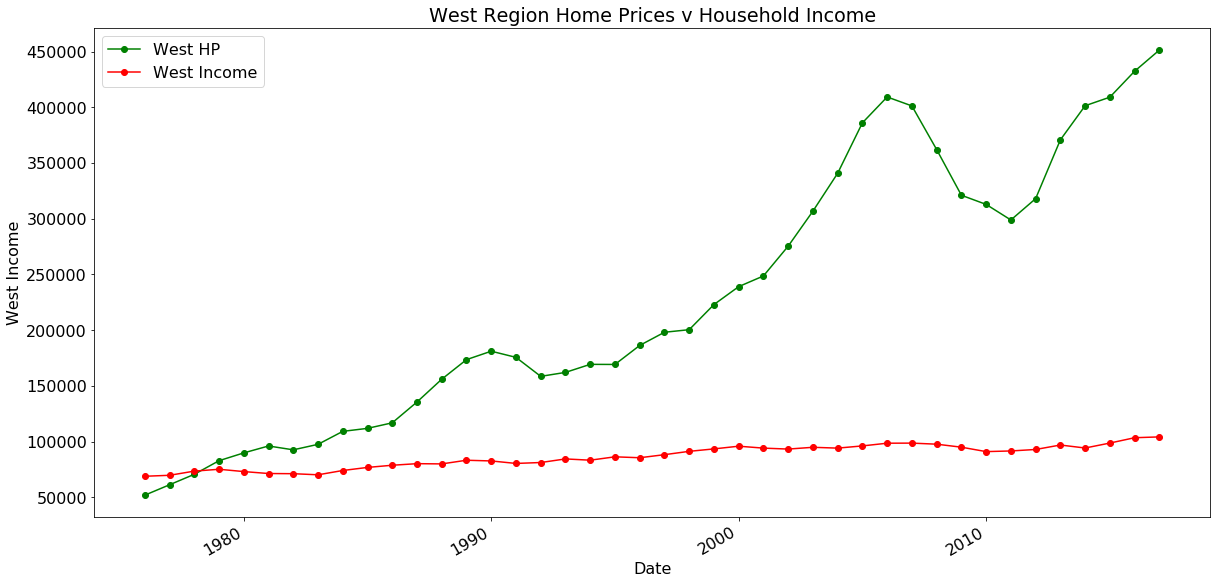

In [83]:
#WEST

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("West Income")

WHP = housing_v_income_region["West HP"]
WI = housing_v_income_region["West Income"]


x_axis1 = housing_v_income_region["Date"]

WHP_trend = plt.plot(x_axis1,WHP,color='g',marker = "o")
WI_trend = plt.plot(x_axis1,WI,color='r',marker = "o")

fig1.autofmt_xdate()
plt.title("West Region Home Prices v Household Income")
plt.savefig("West Vs Income.png")

plt.legend(loc="best")

In [84]:
housing_v_income_region["West Income"].corr(housing_v_income_region["West HP"])

0.9430650391911549

In [85]:
stats.f_oneway(housing_v_income_region["West HP"], housing_v_income_region["West Income"])

F_onewayResult(statistic=57.668281607844655, pvalue=4.4266711954388435e-11)

In [86]:
stats.chisquare(housing_v_income_region["West HP"], housing_v_income_region["West Income"])

Power_divergenceResult(statistic=13891849.3810831, pvalue=0.0)

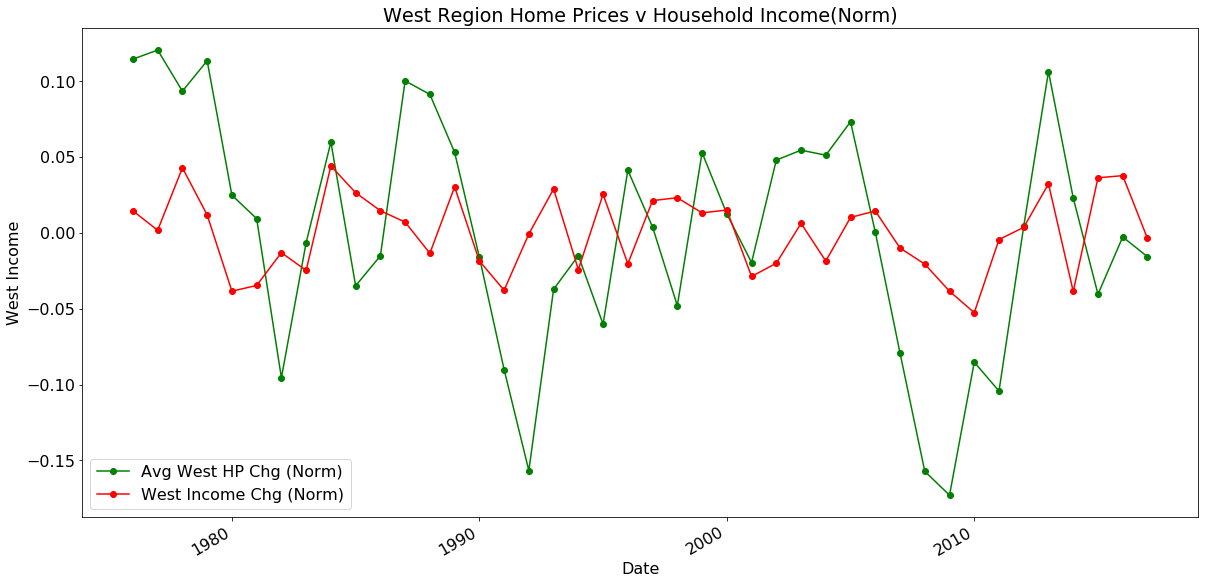

In [87]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("West Income")
plt.title("West Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg West HP Chg (Norm)"]
Inc_W = housing_v_income_region["West Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.title("West Region Home Prices v Household Income(Norm)")
plt.savefig("West Vs Income(Norm).png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [88]:
housing_v_income_region["West Income Chg (Norm)"].corr(housing_v_income_region["Avg West HP Chg (Norm)"])

0.33453760202008065

In [89]:
linregress(housing_v_income_region["West Income Chg (Norm)"], housing_v_income_region["Avg West HP Chg (Norm)"])

LinregressResult(slope=0.9850140951176575, intercept=2.3452713823490827e-11, rvalue=0.3345376020200807, pvalue=0.03035367560889692, stderr=0.43872731850534)

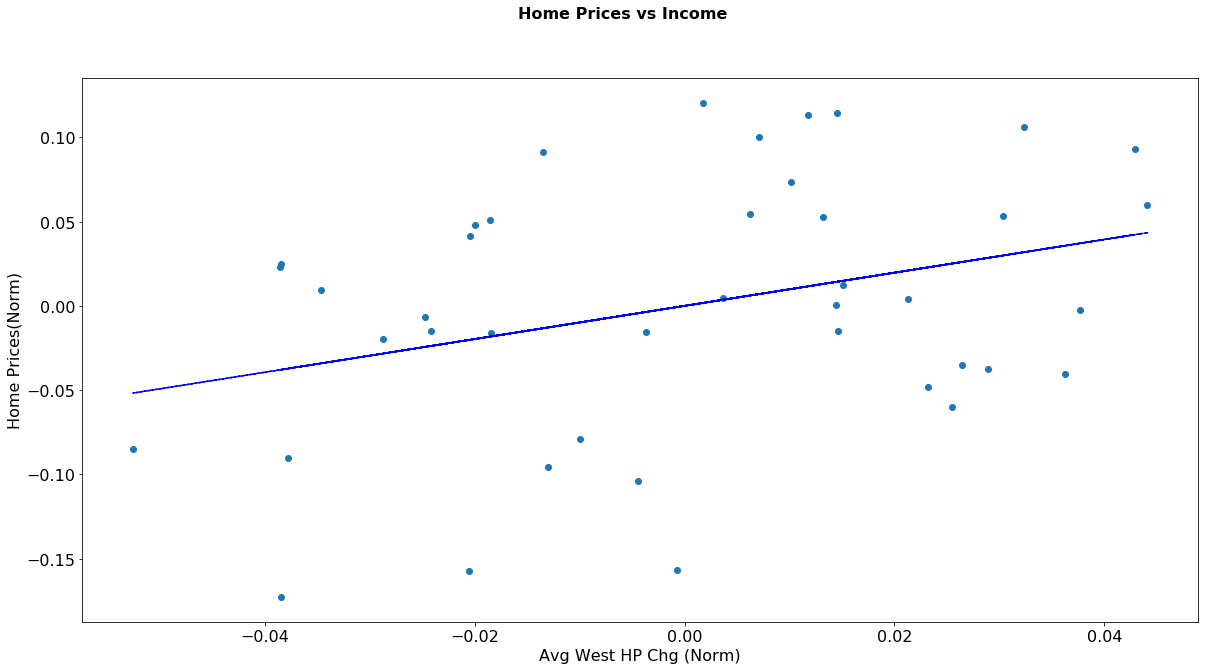

In [90]:
# Set data
x_axis = housing_v_income_region["West Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg West HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg West HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

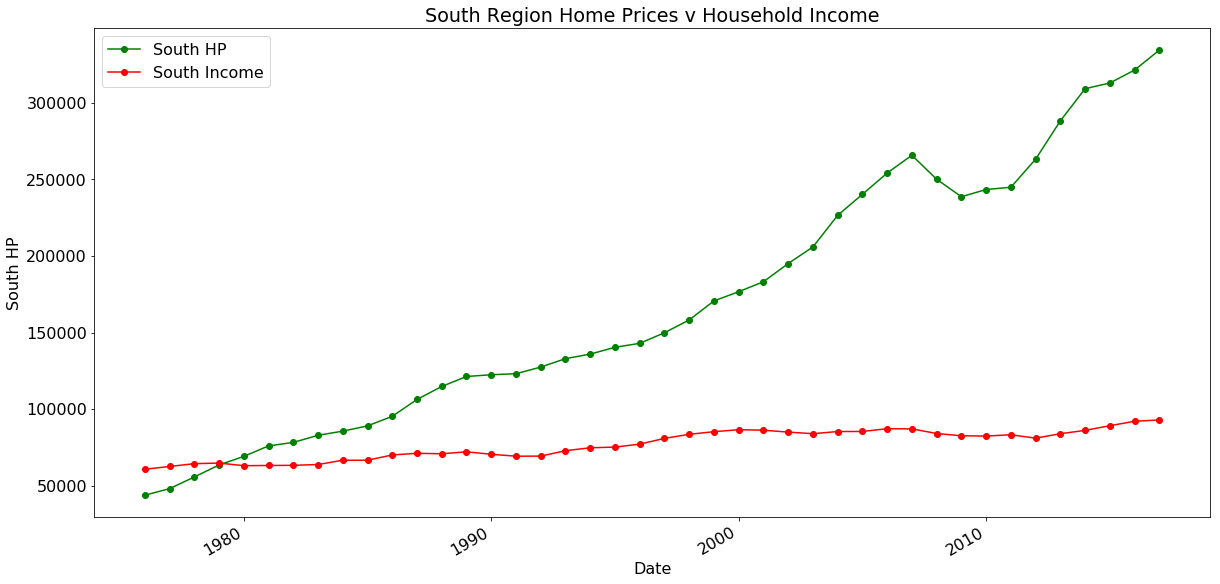

In [91]:
fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("South HP")

SHP = housing_v_income_region["South HP"]
SI = housing_v_income_region["South Income"]


x_axis1 = housing_v_income_region["Date"]

SHP_trend = plt.plot(x_axis1,SHP,color='g',marker = "o")
SI_trend = plt.plot(x_axis1,SI,color='r',marker = "o")
plt.title("South Region Home Prices v Household Income")
plt.savefig("South Vs Income(Norm).png")
fig1.autofmt_xdate()

plt.legend(loc="best")

In [92]:
housing_v_income_region["South Income"].corr(housing_v_income_region["South HP"])

0.9195335517729698

In [93]:
stats.f_oneway(housing_v_income_region["South HP"], housing_v_income_region["South Income"])

F_onewayResult(statistic=49.38628824933491, pvalue=5.672717170767781e-10)

In [94]:
stats.chisquare(housing_v_income_region["South HP"], housing_v_income_region["South Income"])

Power_divergenceResult(statistic=6895696.632259957, pvalue=0.0)

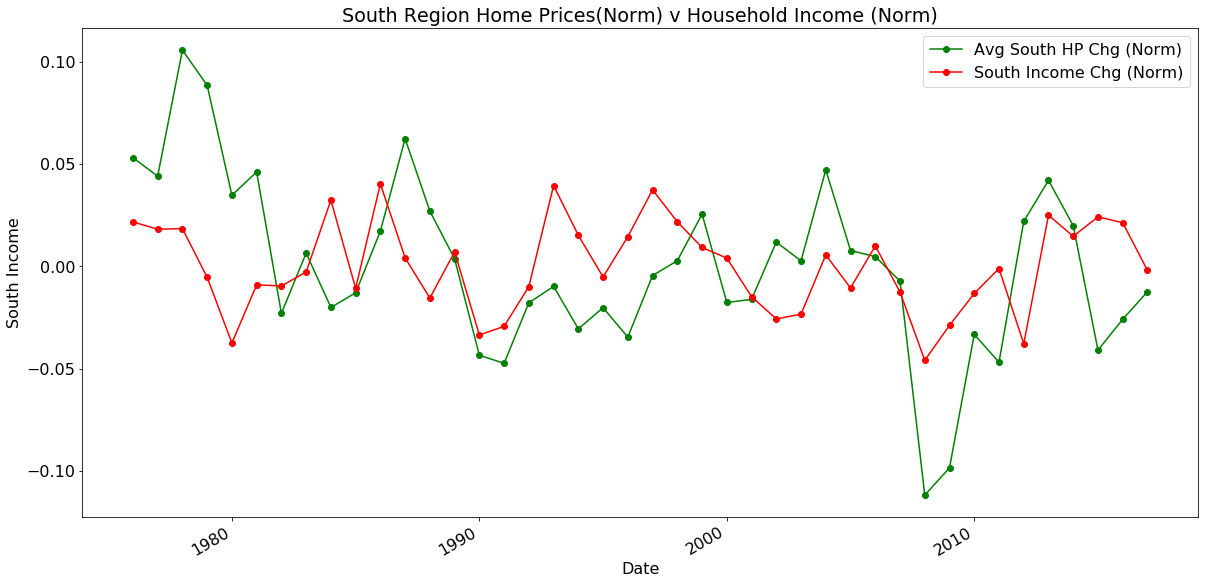

In [95]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("South Income")
plt.title("South Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg South HP Chg (Norm)"]
Inc_W = housing_v_income_region["South Income Chg (Norm)"]

x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.savefig("South Vs Income(Norm).png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [96]:
housing_v_income_region["South Income Chg (Norm)"].corr(housing_v_income_region["Avg South HP Chg (Norm)"])

0.29477451905592733

In [97]:
linregress(housing_v_income_region["South Income Chg (Norm)"], housing_v_income_region["Avg South HP Chg (Norm)"])

LinregressResult(slope=0.5668184051145312, intercept=-1.1191560139718468e-10, rvalue=0.2947745190559273, pvalue=0.058085361044571175, stderr=0.29052604932233544)

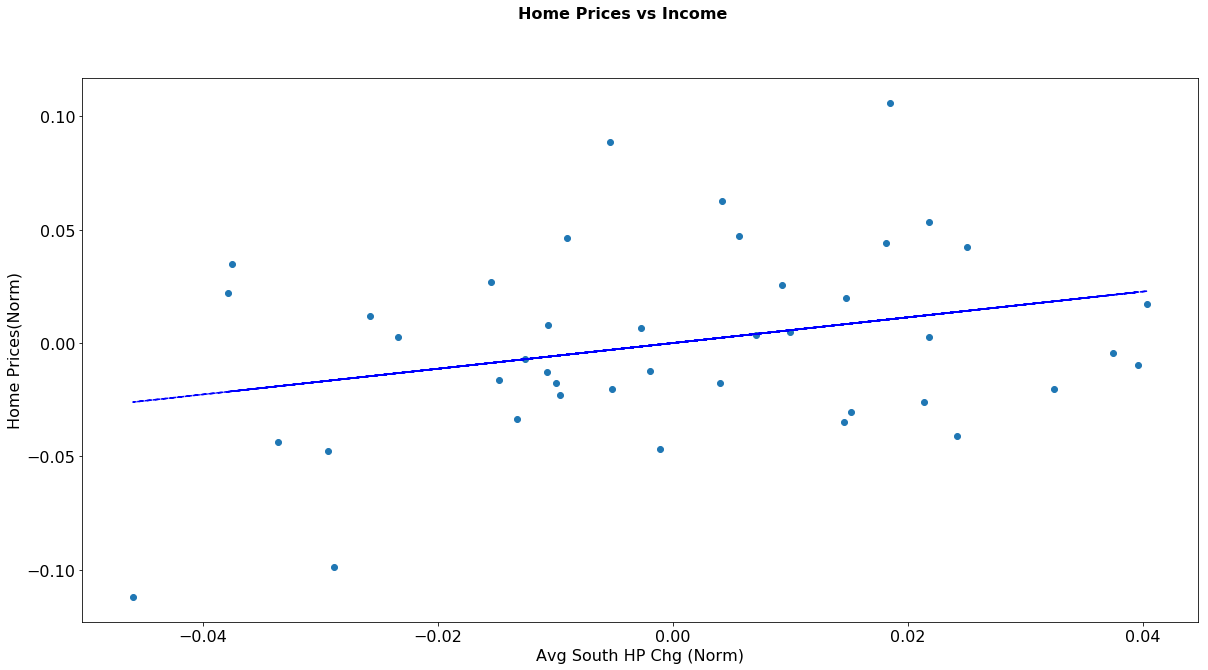

In [98]:
# Set data
x_axis = housing_v_income_region["South Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg South HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

ax.set_xlabel("Avg South HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

In [99]:
#All of US data 
housing_file_US = "housingincome_US.csv"
housing_v_income_US = pd.read_csv(housing_file_US)
housing_v_income_US.head()

,Date,AI,Avg HP,Avg US HP Chg,Annual Income Chg,Avg HP Chg (Norm),Income Chg (Norm)
0,1976,16870,44225,0.126034,0.085167,0.070020,0.034238
1,1977,18264,48900,0.105709,0.082632,0.049695,0.031703
2,1978,20091,55850,0.142127,0.100033,0.086113,0.049104
3,1979,22316,62750,0.123545,0.110746,0.067531,0.059818
4,1980,23974,64750,0.031873,0.074296,-0.024141,0.023368


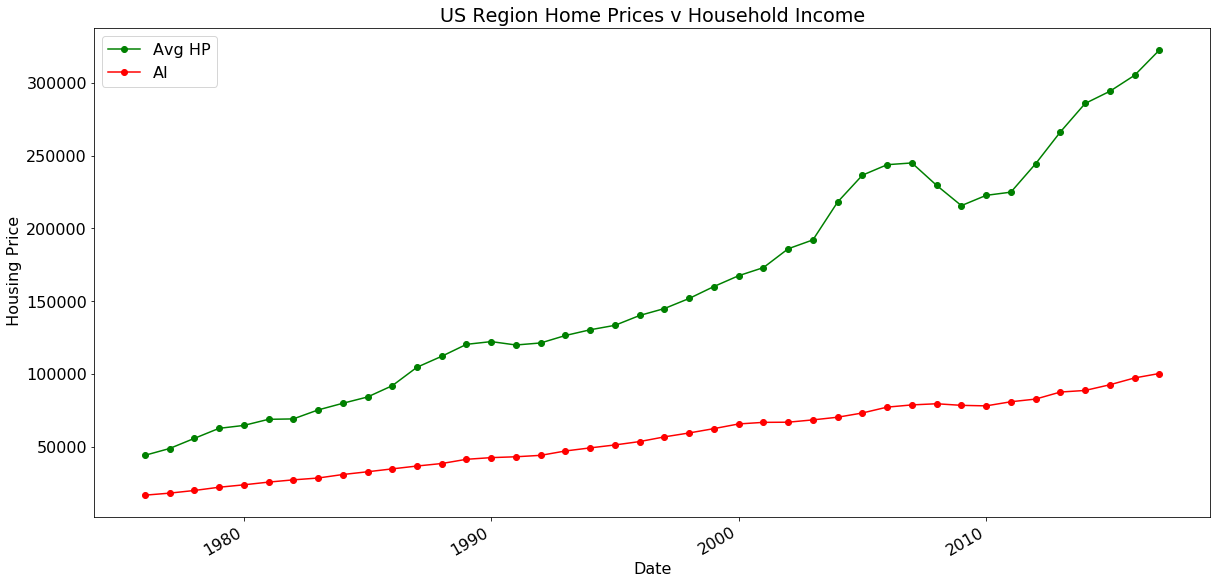

In [100]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel(" Housing Price")
plt.title("US Region Home Prices v Household Income")

USHP = housing_v_income_US["Avg HP"]
USI = housing_v_income_US["AI"]

x_axis1 = housing_v_income_US["Date"]

USHP_trend = plt.plot(x_axis1,USHP,color='g',marker = "o")
USI_trend = plt.plot(x_axis1,USI,color='r',marker = "o")
plt.savefig("US Region Vs Income.png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [101]:
housing_v_income_US["AI"].corr(housing_v_income_US["Avg HP"])

0.9874363971778967

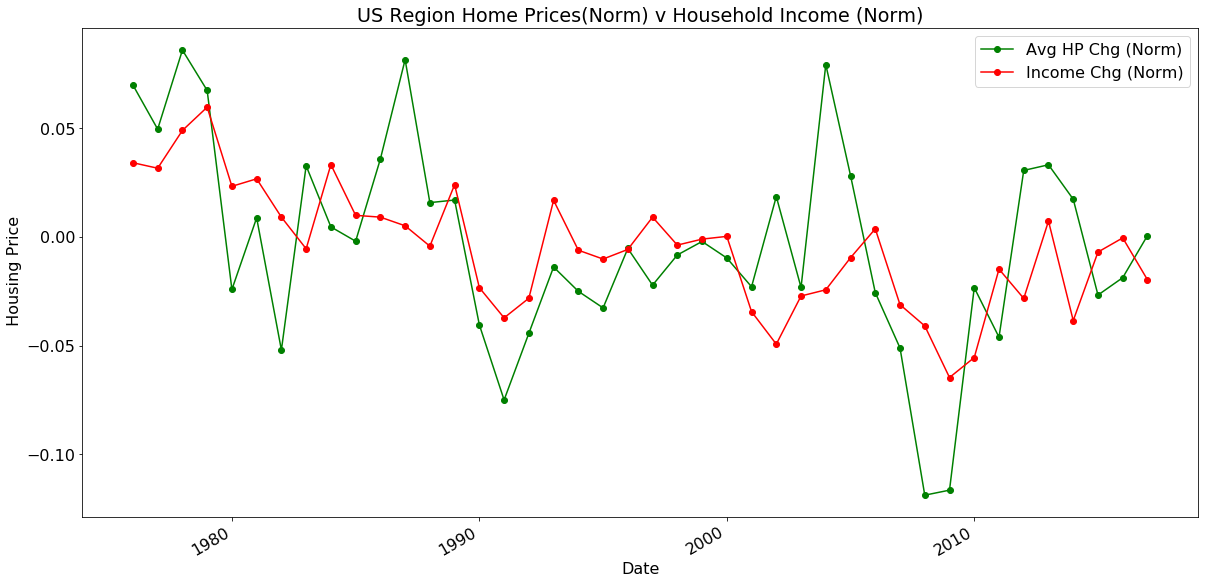

In [102]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel(" Housing Price")
plt.title("US Region Home Prices(Norm) v Household Income (Norm)")

USHP = housing_v_income_US["Avg HP Chg (Norm)"]
USI = housing_v_income_US["Income Chg (Norm)"]

x_axis1 = housing_v_income_US["Date"]

USHP_trend = plt.plot(x_axis1,USHP,color='g',marker = "o")
USI_trend = plt.plot(x_axis1,USI,color='r',marker = "o")
plt.savefig("US Region Vs Income (Norm).png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [103]:
housing_v_income_US["Income Chg (Norm)"].corr(housing_v_income_US["Avg HP Chg (Norm)"])

0.562822727768101

In [104]:
linregress(housing_v_income_US["Income Chg (Norm)"], housing_v_income_US["Avg HP Chg (Norm)"])

LinregressResult(slope=0.9459648246106103, intercept=0.001282833811002056, rvalue=0.5628227277681012, pvalue=0.00010449563145163793, stderr=0.21966305152379784)

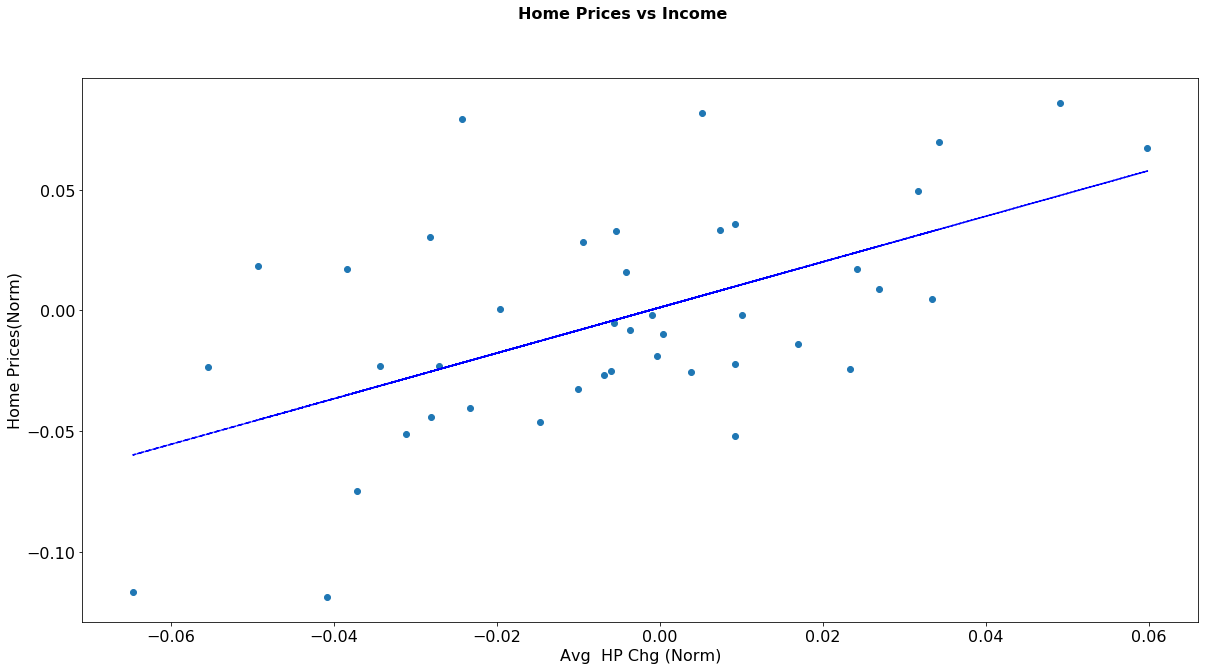

In [105]:
# Set data
x_axis = housing_v_income_US["Income Chg (Norm)"]
y_axis = housing_v_income_US["Avg HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

ax.set_xlabel("Avg  HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')